# <span style="color:gold">Data Understanding</span>
* This data set is off of the SXSW Event twitter feed in 2013 [here](https://schedule.sxsw.com/2013/events/grid?day=8)
* The link to the download of the data set is [here](https://data.world/crowdflower/brands-and-product-emotions)
* The dataset contains 9,093 entries.

# <span style="color:gold">Apple Products in this dataset</span>
* apple                              
* ipad                               
* iPad 
* iphone                             
* Apple 
* iPad or iPhone App
* iPhone 
* Other Apple product or service 
# <span style="color:gold">Google Products in this data set</span>               
* Google                             
* android                            
* google                              
* Other Google product or service    
* Android App                        
* Android                           
# <span style="color:gold">Product wasn't marked</span>
* Unknown   

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cleaned_twitter_data.csv', encoding='unicode_escape')

In [5]:
df

,Tweet,Brand/Product,Emotion,Tokens_without_stopwords,Tokenized_Tweet
0,i have a g iphone after hrs tweeting at rise...,iPhone,Negative emotion,"['g', 'iphone', 'hrs', 'tweeting', 'rise_austi...","['i', 'have', 'a', 'g', 'iphone', 'after', 'hr..."
1,know about awesome ipadiphone app that youl...,iPad or iPhone App,Positive emotion,"['know', 'awesome', 'ipadiphone', 'app', 'youl...","['know', 'about', 'awesome', 'ipadiphone', 'ap..."
2,can not wait for ipad also they should sale ...,iPad,Positive emotion,"['wait', 'ipad', 'also', 'sale', 'sxsw']","['can', 'not', 'wait', 'for', 'ipad', 'also', ..."
3,i hope this years festival isnt as crashy as ...,iPad or iPhone App,Negative emotion,"['hope', 'years', 'festival', 'isnt', 'crashy'...","['i', 'hope', 'this', 'years', 'festival', 'is..."
4,great stuff on fri sxsw marissa mayer google ...,Google,Positive emotion,"['great', 'stuff', 'fri', 'sxsw', 'marissa', '...","['great', 'stuff', 'on', 'fri', 'sxsw', 'maris..."
...,...,...,...,...,...
9087,ipad everywhere sxsw link,iPad,Positive emotion,"['ipad', 'everywhere', 'sxsw', 'link']","['ipad', 'everywhere', 'sxsw', 'link']"
9088,wave buzz rt we interrupt your regularly sche...,google,No emotion toward brand or product,"['wave', 'buzz', 'rt', 'interrupt', 'regularly...","['wave', 'buzz', 'rt', 'we', 'interrupt', 'you..."
9089,googles zeiger a physician never reported pote...,google,No emotion toward brand or product,"['googles', 'zeiger', 'physician', 'never', 'r...","['googles', 'zeiger', 'a', 'physician', 'never..."
9090,some verizon iphone customers complained their...,iphone,No emotion toward brand or product,"['verizon', 'iphone', 'customers', 'complained...","['some', 'verizon', 'iphone', 'customers', 'co..."


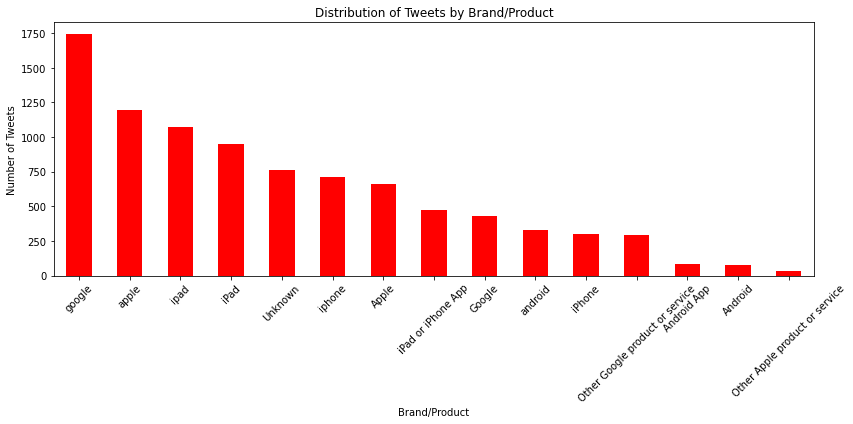

In [10]:
# Bar chart for distribution of tweets by "Brand/Product"
plt.figure(figsize=(12, 6))
df['Brand/Product'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Tweets by Brand/Product')
plt.xlabel('Brand/Product')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

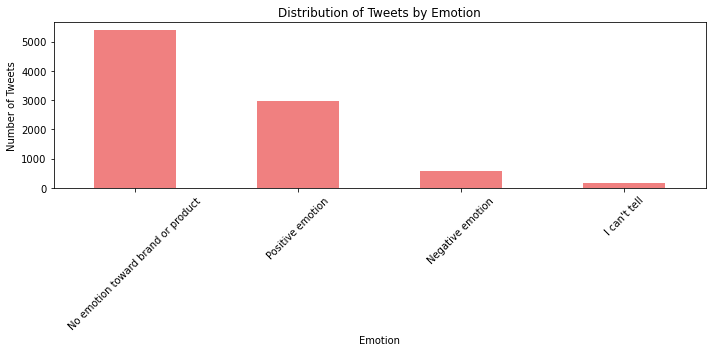

In [11]:
plt.figure(figsize=(10, 5))
df['Emotion'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Tweets by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

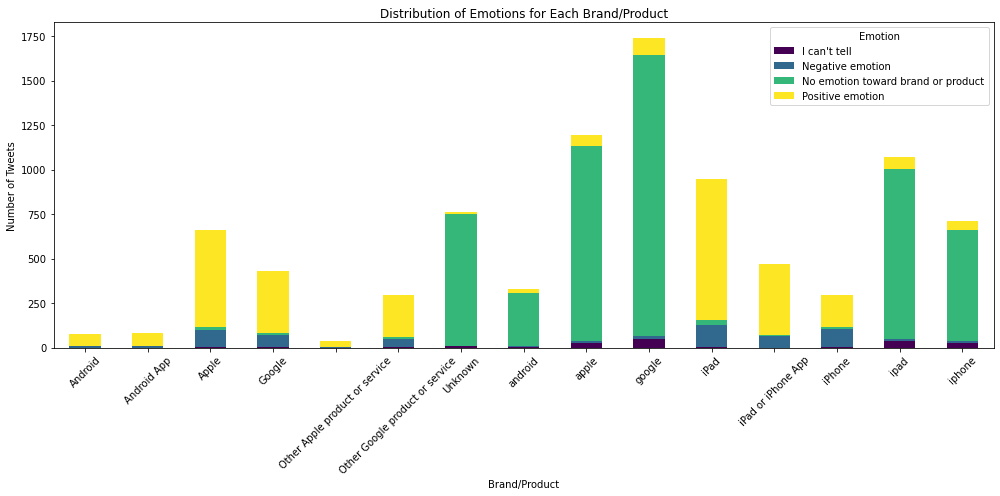

In [12]:
emotion_distribution = pd.crosstab(df['Brand/Product'], df['Emotion'])

# Stacked bar chart for distribution of emotions for each "Brand/Product"
emotion_distribution.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Distribution of Emotions for Each Brand/Product')
plt.xlabel('Brand/Product')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

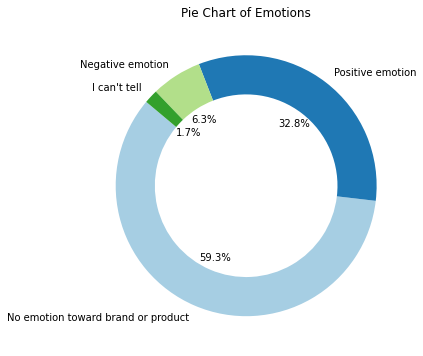

In [15]:
# 1. Pie Chart of Emotions

emotion_counts = df['Emotion'].value_counts()
plt.figure(figsize=(10, 6))
emotion_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops=dict(width=0.3))
plt.title('Pie Chart of Emotions')
plt.ylabel('')  # Removing the default 'Emotion' label from y-axis

plt.show()


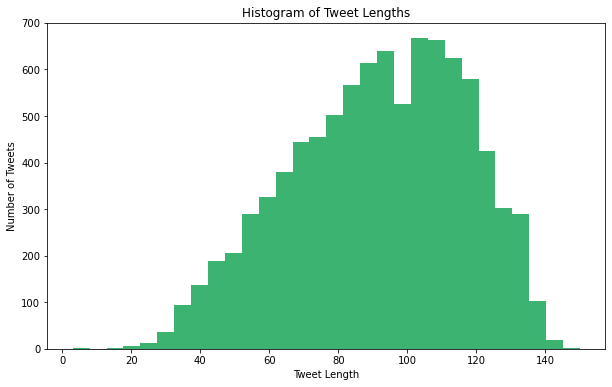

In [17]:
# 2. Histogram of Tweet Lengths

# Calculate the length of each tweet
df['Tweet_Length'] = df['Tweet'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['Tweet_Length'], bins=30, color='mediumseagreen')
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')

plt.show()


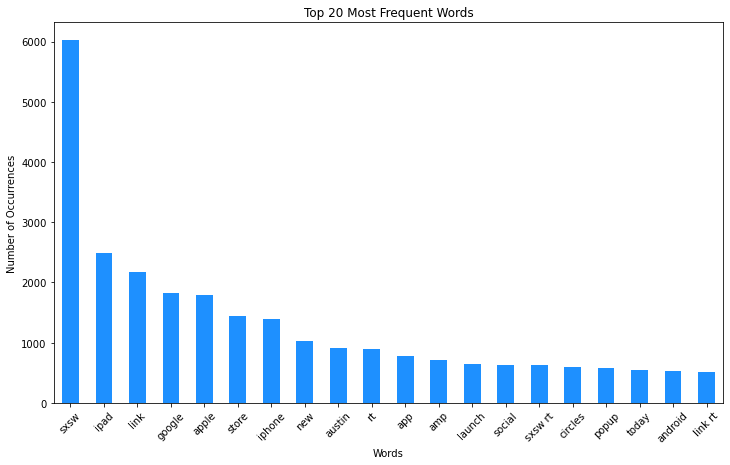

In [18]:
# Get the entire dataset's tokens and count their occurrences
all_tokens = ' '.join(df['Tokens_without_stopwords'].astype(str)).replace('[', '').replace(']', '').replace('\'', '').split(', ')
token_series = pd.Series(all_tokens)

# Get the top 20 most frequent tokens
top_tokens = token_series.value_counts().head(20)

plt.figure(figsize=(12, 7))
top_tokens.plot(kind='bar', color='dodgerblue')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)

plt.show()

<Figure size 864x504 with 0 Axes>

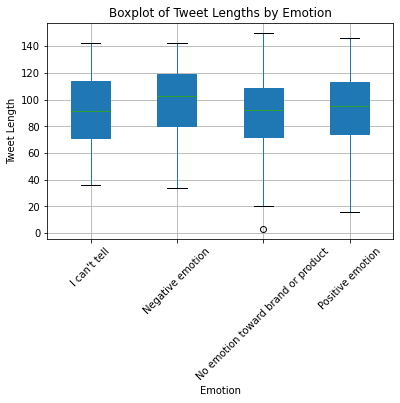

In [19]:

plt.figure(figsize=(12, 7))
df.boxplot(column='Tweet_Length', by='Emotion', patch_artist=True)
plt.title('Boxplot of Tweet Lengths by Emotion')
plt.suptitle('')  # Removing the default title
plt.xlabel('Emotion')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)

plt.show()